#📌 Extracción

In [43]:
# Importar librerías necesarias
import pandas as pd
import requests
import json

# 1. Cargar datos desde la API (URL raw de GitHub)
url = "https://raw.githubusercontent.com/ingchavo/Challenge_TelecomX_1/64dc016e73a6c464a7a307e4431cb5ed9d4ee497/TelecomX_Data.json"
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Convertir respuesta a formato JSON
    data = response.json()

    # 2. Convertir a DataFrame de Pandas
    df = pd.DataFrame(data)

    # 3. Visualizar las 10 primeras filas
    print("=== 5 PRIMERAS FILAS ===")
    display(df.head(5))

    # 4. Visualizar información de columnas
    print("\n=== INFORMACIÓN DE COLUMNAS ===")
    df.info()

else:
    print(f"Error al cargar datos. Código de estado: {response.status_code}")


=== 5 PRIMERAS FILAS ===


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



=== INFORMACIÓN DE COLUMNAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [44]:
# 1. Exploración inicial de tipos de datos y estructura
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
df.info()
df.dtypes



=== INFORMACIÓN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


Diccionario de datos
https://github.com/ingchavo/Challenge_TelecomX_1/blob/master/TelecomX_diccionario.md#diccionario-de-datos



In [45]:
# Normalizar las columnas anidadas
df_normalized = pd.concat([
    df[['customerID', 'Churn']],  # Columnas no anidadas
    pd.json_normalize(df['customer']),      # Datos de 'customer'
    pd.json_normalize(df['phone']),         # Datos de 'phone'
    pd.json_normalize(df['internet']),      # Datos de 'internet'
    pd.json_normalize(df['account']),       # Datos de 'account' (excepto 'Charges')
   ], axis=1)

# Renombrar columnas de cargos para mayor claridad
df_normalized = df_normalized.rename(columns={
    'Monthly': 'Charges.Monthly',
    'Total': 'Charges.Total'
})

# Mostrar el DataFrame normalizado
print("=== DataFrame Normalizado ===")
display(df_normalized.head())

# Verificar estructura
print("\n=== Tipos de datos ===")
print(df_normalized.dtypes)
df_normalized.info()

=== DataFrame Normalizado ===


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



=== Tipos de datos ===
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-

In [46]:
# Función para analizar valores únicos
def analyze_unique_values(df):
    print("\n{:=^50}".format(" Análisis de valores únicos por columna "))
    for column in df.columns:
        unique_values = df[column].unique()
        num_unique = len(unique_values)

        print(f"\n* Columna: {column}")
        print(f"  - Tipo de dato: {df[column].dtype}")
        print(f"  - Valores únicos: {num_unique}")
        print(f"  - Cardinalidad (%): {round((num_unique / len(df)) * 100, 2)}%")

        # Mostrar valores únicos si son pocos
        if num_unique <= 10:
            print(f"  - Valores: {sorted(unique_values)}")
        else:
            print(f"  - Primeros 5 valores: {sorted(unique_values[:5])} [...]")

analyze_unique_values(df_normalized)

# Análisis adicional para columnas categóricas
categorical_cols = df_normalized.select_dtypes(include=['object', 'category']).columns
print("\n{:=^50}".format(" Resumen Columnas Categóricas "))
for col in categorical_cols:
    print(f"\n* {col}:")
    print(df_normalized[col].value_counts(dropna=False).head())


===== Análisis de valores únicos por columna =====

* Columna: customerID
  - Tipo de dato: object
  - Valores únicos: 7267
  - Cardinalidad (%): 100.0%
  - Primeros 5 valores: ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0011-IGKFF', '0013-EXCHZ'] [...]

* Columna: Churn
  - Tipo de dato: object
  - Valores únicos: 3
  - Cardinalidad (%): 0.04%
  - Valores: ['', 'No', 'Yes']

* Columna: gender
  - Tipo de dato: object
  - Valores únicos: 2
  - Cardinalidad (%): 0.03%
  - Valores: ['Female', 'Male']

* Columna: SeniorCitizen
  - Tipo de dato: int64
  - Valores únicos: 2
  - Cardinalidad (%): 0.03%
  - Valores: [np.int64(0), np.int64(1)]

* Columna: Partner
  - Tipo de dato: object
  - Valores únicos: 2
  - Cardinalidad (%): 0.03%
  - Valores: ['No', 'Yes']

* Columna: Dependents
  - Tipo de dato: object
  - Valores únicos: 2
  - Cardinalidad (%): 0.03%
  - Valores: ['No', 'Yes']

* Columna: tenure
  - Tipo de dato: int64
  - Valores únicos: 73
  - Cardinalidad (%): 1.0%
  - Primeros 5 

In [47]:
# Verificar duplicados en todo el DataFrame
print("=== ANÁLISIS DE REGISTROS DUPLICADOS ===")

# 1. Verificación básica
total_duplicados = df_normalized.duplicated().sum()
print(f"\nNúmero total de registros completamente duplicados: {total_duplicados}")

# 2. Verificación por columna clave (ej: customerID)
if 'customerID' in df_normalized.columns:
    duplicados_id = df_normalized['customerID'].duplicated().sum()
    print(f"\nRegistros con customerID duplicado: {duplicados_id}")
    if duplicados_id > 0:
        display(df_normalized[df_normalized['customerID'].duplicated(keep=False)].sort_values('customerID').head())

# 3. Verificación de duplicados en combinaciones de columnas
columnas_relevantes = ['customerID', 'Churn', 'tenure']  # Ajusta según tus necesidades
if all(col in df_normalized.columns for col in columnas_relevantes):
    duplicados_combinados = df_normalized.duplicated(subset=columnas_relevantes).sum()
    print(f"\nRegistros duplicados en combinación {columnas_relevantes}: {duplicados_combinados}")

=== ANÁLISIS DE REGISTROS DUPLICADOS ===

Número total de registros completamente duplicados: 0

Registros con customerID duplicado: 0

Registros duplicados en combinación ['customerID', 'Churn', 'tenure']: 0


In [48]:
# 1. Análisis básico de valores nulos
print("=== ANÁLISIS DE VALORES NULOS ===")
total_nulos = df_normalized.isnull().sum().sum()
print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")

# 2. Nulos por columna
nulos_por_columna = df_normalized.isnull().sum()
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]  # Solo mostrar columnas con nulos
print("\nValores nulos por columna:")
print(nulos_por_columna)

=== ANÁLISIS DE VALORES NULOS ===

Total de valores nulos en el DataFrame: 0

Valores nulos por columna:
Series([], dtype: int64)


In [49]:
# 1. Verificar cadenas vacías o espacios en blanco
print("=== ANÁLISIS DE VALORES VACÍOS O BLANCOS ===")

# Identificar columnas de tipo objeto (strings)
string_cols = df_normalized.select_dtypes(include=['object']).columns

if len(string_cols) > 0:
    # Lista para almacenar resultados
    resultados_data = []

    for col in string_cols:
        # Contar cadenas vacías
        vacios = (df_normalized[col] == '').sum()
        # Contar solo espacios en blanco (usando str.strip() para seguridad)
        blancos = (df_normalized[col].astype(str).str.strip() == '').sum() - vacios

        if vacios > 0 or blancos > 0:
            resultados_data.append({
                'Columna': col,
                'Valores vacíos ("")': vacios,
                'Espacios en blanco (" ")': blancos,
                'Total problemas': vacios + blancos
            })

    if resultados_data:
        resultados = pd.DataFrame(resultados_data)
        print("\nColumnas con valores vacíos o blancos:")
        display(resultados)

        # Mostrar filas problemáticas como ejemplo
        print("\nEjemplo de filas con problemas:")
        for col in resultados['Columna']:
            mask = (df_normalized[col] == '') | (df_normalized[col].astype(str).str.strip() == '')
            problematicas = df_normalized[mask]
            if not problematicas.empty:
                print(f"\nColumna '{col}':")
                display(problematicas.head(2))
    else:
        print("\n✓ No se encontraron valores vacíos o espacios en blanco en columnas de texto")
else:
    print("\n✓ El DataFrame no contiene columnas de texto (tipo object) para analizar")

# 2. Verificación adicional de valores nulos (NaN/None)
print("\n=== VERIFICACIÓN ADICIONAL DE VALORES NULOS ===")
nulos = df_normalized.isnull().sum()
nulos = nulos[nulos > 0]
if not nulos.empty:
    print("Columnas con valores nulos (NaN/None):")
    print(nulos)
else:
    print("✓ No se encontraron valores nulos (NaN/None)")

=== ANÁLISIS DE VALORES VACÍOS O BLANCOS ===

Columnas con valores vacíos o blancos:


,Columna,"Valores vacíos ("""")","Espacios en blanco ("" "")",Total problemas
0,Churn,224,0,224
1,Charges.Total,0,11,11



Ejemplo de filas con problemas:

Columna 'Churn':


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.0,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.9,1355.1



Columna 'Charges.Total':


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,



=== VERIFICACIÓN ADICIONAL DE VALORES NULOS ===
✓ No se encontraron valores nulos (NaN/None)


In [50]:
# Verificar si la columna existe
if 'Charges.Total' in df_normalized.columns:
    try:
        # Convertir a float (manejando comas, strings vacíos, etc.)
        df_normalized['Charges.Total'] = pd.to_numeric(
            df_normalized['Charges.Total'].astype(str).str.replace(',', '.'),  # Reemplazar comas por puntos
            errors='coerce'  # Convertir errores a NaN
        ).astype('float64')

        print("✓ Columna 'Charges.Total' convertida a float64 exitosamente")
        print("\nResumen de la conversión:")
        print(df_normalized['Charges.Total'].describe())

    except Exception as e:
        print(f"Error al convertir: {str(e)}")
        print("\nValores problemáticos encontrados:")
        # Mostrar filas con valores no convertibles
        problematic_values = df_normalized[~df_normalized['Charges.Total'].astype(str).str.replace(',', '.').str.isnumeric()]
        display(problematic_values[['Charges.Total']].drop_duplicates().head())
else:
    print("La columna 'Charges.Total' no existe en el DataFrame")

✓ Columna 'Charges.Total' convertida a float64 exitosamente

Resumen de la conversión:
count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: Charges.Total, dtype: float64


In [51]:
# Verificar si la columna existe
if 'Churn' in df_normalized.columns:
    # Crear copia del DataFrame original para preservar los datos si es necesario
    df_cleaned = df_normalized.copy()

    # Contar registros antes de la limpieza
    original_rows = len(df_cleaned)

    # Eliminar registros donde 'Churn' esté vacío (NaN, None o string vacío)
    df_cleaned = df_cleaned[
        ~df_cleaned['Churn'].isna() &  # Elimina NaN/None
        (df_cleaned['Churn'].astype(str).str.strip() != '')  # Elimina strings vacíos o con espacios
    ]

    # Contar registros eliminados
    removed_rows = original_rows - len(df_cleaned)

    # Resultados
    print(f"✓ Registros originales: {original_rows}")
    print(f"✓ Registros eliminados: {removed_rows}")
    print(f"✓ Registros restantes: {len(df_cleaned)}")

    # Mostrar distribución actualizada de 'Churn'
    print("\nDistribución actualizada de 'Churn':")
    print(df_cleaned['Churn'].value_counts(dropna=False))

    # Actualizar el DataFrame original (opcional)
    df_normalized = df_cleaned
else:
    print("La columna 'Churn' no existe en el DataFrame")

✓ Registros originales: 7267
✓ Registros eliminados: 224
✓ Registros restantes: 7043

Distribución actualizada de 'Churn':
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [52]:
# 1. Verificar cadenas vacías o espacios en blanco
print("=== ANÁLISIS DE VALORES VACÍOS O BLANCOS ===")

# Identificar columnas de tipo objeto (strings)
string_cols = df_normalized.select_dtypes(include=['object']).columns

if len(string_cols) > 0:
    # Lista para almacenar resultados
    resultados_data = []

    for col in string_cols:
        # Contar cadenas vacías
        vacios = (df_normalized[col] == '').sum()
        # Contar solo espacios en blanco (usando str.strip() para seguridad)
        blancos = (df_normalized[col].astype(str).str.strip() == '').sum() - vacios

        if vacios > 0 or blancos > 0:
            resultados_data.append({
                'Columna': col,
                'Valores vacíos ("")': vacios,
                'Espacios en blanco (" ")': blancos,
                'Total problemas': vacios + blancos
            })

    if resultados_data:
        resultados = pd.DataFrame(resultados_data)
        print("\nColumnas con valores vacíos o blancos:")
        display(resultados)

        # Mostrar filas problemáticas como ejemplo
        print("\nEjemplo de filas con problemas:")
        for col in resultados['Columna']:
            mask = (df_normalized[col] == '') | (df_normalized[col].astype(str).str.strip() == '')
            problematicas = df_normalized[mask]
            if not problematicas.empty:
                print(f"\nColumna '{col}':")
                display(problematicas.head(2))
    else:
        print("\n✓ No se encontraron valores vacíos o espacios en blanco en columnas de texto")
else:
    print("\n✓ El DataFrame no contiene columnas de texto (tipo object) para analizar")

# 2. Verificación adicional de valores nulos (NaN/None)
print("\n=== VERIFICACIÓN ADICIONAL DE VALORES NULOS ===")
nulos = df_normalized.isnull().sum()
nulos = nulos[nulos > 0]
if not nulos.empty:
    print("Columnas con valores nulos (NaN/None):")
    print(nulos)
else:
    print("✓ No se encontraron valores nulos (NaN/None)")

=== ANÁLISIS DE VALORES VACÍOS O BLANCOS ===

✓ No se encontraron valores vacíos o espacios en blanco en columnas de texto

=== VERIFICACIÓN ADICIONAL DE VALORES NULOS ===
Columnas con valores nulos (NaN/None):
Charges.Total    11
dtype: int64


In [53]:
import numpy as np

# Verificar si la columna existe
if 'Charges.Total' in df_normalized.columns:
    # Paso 1: Convertir la columna a string y limpiar espacios en blanco
    df_normalized['Charges.Total'] = df_normalized['Charges.Total'].astype(str).str.strip()

    # Paso 2: Reemplazar strings vacíos y NaN por 0
    df_normalized['Charges.Total'] = df_normalized['Charges.Total'].replace(
        ['', 'nan', 'NaN', 'None', np.nan],  # Valores a reemplazar
        0  # Valor de reemplazo
    )

    # Paso 3: Convertir a float (asegurando el tipo de dato)
    df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce').fillna(0)

    # Verificación
    print("✓ Valores nulos/vacíos reemplazados con 0")
    print("\nResumen de la columna 'Charges.Total':")
    print(df_normalized['Charges.Total'].describe())

    # Opcional: Mostrar conteo de ceros
    zeros_count = (df_normalized['Charges.Total'] == 0).sum()
    print(f"\nRegistros con valor 0: {zeros_count}")
else:
    print("La columna 'Charges.Total' no existe en el DataFrame")

✓ Valores nulos/vacíos reemplazados con 0

Resumen de la columna 'Charges.Total':
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: Charges.Total, dtype: float64

Registros con valor 0: 11


In [54]:
# 1. Verificar cadenas vacías o espacios en blanco
print("=== ANÁLISIS DE VALORES VACÍOS O BLANCOS ===")

# Identificar columnas de tipo objeto (strings)
string_cols = df_normalized.select_dtypes(include=['object']).columns

if len(string_cols) > 0:
    # Lista para almacenar resultados
    resultados_data = []

    for col in string_cols:
        # Contar cadenas vacías
        vacios = (df_normalized[col] == '').sum()
        # Contar solo espacios en blanco (usando str.strip() para seguridad)
        blancos = (df_normalized[col].astype(str).str.strip() == '').sum() - vacios

        if vacios > 0 or blancos > 0:
            resultados_data.append({
                'Columna': col,
                'Valores vacíos ("")': vacios,
                'Espacios en blanco (" ")': blancos,
                'Total problemas': vacios + blancos
            })

    if resultados_data:
        resultados = pd.DataFrame(resultados_data)
        print("\nColumnas con valores vacíos o blancos:")
        display(resultados)

        # Mostrar filas problemáticas como ejemplo
        print("\nEjemplo de filas con problemas:")
        for col in resultados['Columna']:
            mask = (df_normalized[col] == '') | (df_normalized[col].astype(str).str.strip() == '')
            problematicas = df_normalized[mask]
            if not problematicas.empty:
                print(f"\nColumna '{col}':")
                display(problematicas.head(2))
    else:
        print("\n✓ No se encontraron valores vacíos o espacios en blanco en columnas de texto")
else:
    print("\n✓ El DataFrame no contiene columnas de texto (tipo object) para analizar")

# 2. Verificación adicional de valores nulos (NaN/None)
print("\n=== VERIFICACIÓN ADICIONAL DE VALORES NULOS ===")
nulos = df_normalized.isnull().sum()
nulos = nulos[nulos > 0]
if not nulos.empty:
    print("Columnas con valores nulos (NaN/None):")
    print(nulos)
else:
    print("✓ No se encontraron valores nulos (NaN/None)")

=== ANÁLISIS DE VALORES VACÍOS O BLANCOS ===

✓ No se encontraron valores vacíos o espacios en blanco en columnas de texto

=== VERIFICACIÓN ADICIONAL DE VALORES NULOS ===
✓ No se encontraron valores nulos (NaN/None)


In [55]:
df_normalized.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [56]:
# Verificar si la columna 'Charges.Monthly' existe
if 'Charges.Monthly' in df_normalized.columns:
    # Crear la nueva columna dividiendo por 30 (cálculo diario)
    df_normalized['Cuentas_Diarias'] = df_normalized['Charges.Monthly'] / 30

    # Redondear a 4 decimales (opcional)
    df_normalized['Cuentas_Diarias'] = df_normalized['Cuentas_Diarias'].round(4)

    # Mostrar confirmación y resultados
    print("✓ Columna 'Cuentas_Diarias' creada exitosamente")
    print("\nMuestra de los resultados (primeras 5 filas):")
    display(df_normalized[['Charges.Monthly', 'Cuentas_Diarias']].head())
else:
    print("Error: La columna 'Charges.Monthly' no existe en el DataFrame")

✓ Columna 'Cuentas_Diarias' creada exitosamente

Muestra de los resultados (primeras 5 filas):


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.1867
1,59.9,1.9967
2,73.9,2.4633
3,98.0,3.2667
4,83.9,2.7967


In [57]:
df_normalized

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.1867
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.9967
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.4633
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.2667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.8383
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.8367
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.6767
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.2617


#📊 Carga y análisis

In [58]:
df_normalized.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608300
25%,0.000000,9.000000,35.500000,398.550000,1.183300
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958300


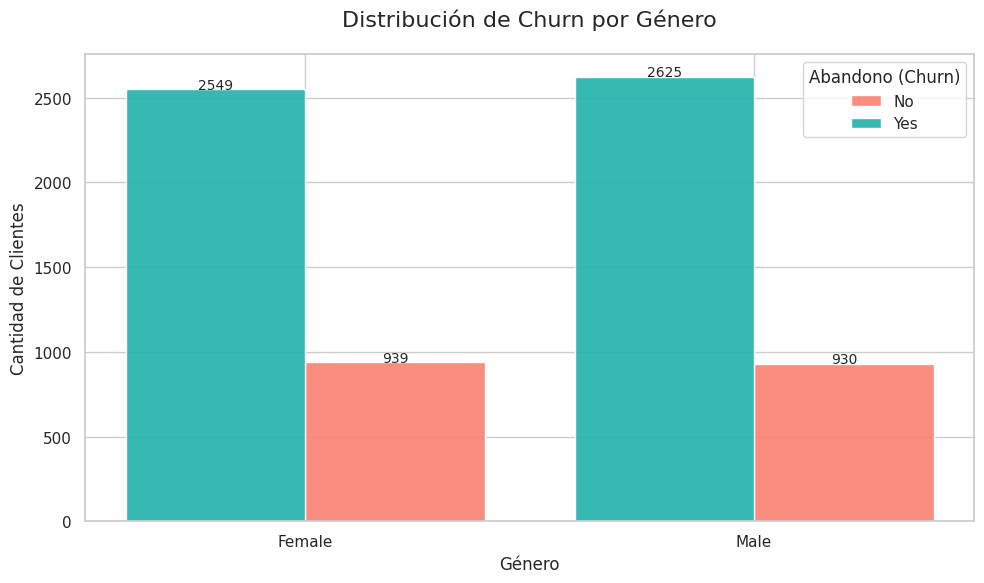

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar que las columnas existan
if {'Churn', 'gender'}.issubset(df_normalized.columns):
    # Configurar el estilo visual
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Crear el histograma agrupado
    ax = sns.histplot(
        data=df_normalized,
        x="gender",
        hue="Churn",
        multiple="dodge",  # Barras lado a lado
        shrink=0.8,       # Espacio entre barras
        palette={"Yes": "salmon", "No": "lightseagreen"},  # Colores personalizados
        alpha=0.9,        # Transparencia
        edgecolor='white'  # Borde blanco
    )

    # Personalizar el gráfico
    plt.title('Distribución de Churn por Género', fontsize=16, pad=20)
    plt.xlabel('Género', fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(fontsize=11)

    # Mostrar porcentajes en las barras
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3,
                f'{int(height)}',
                ha="center", fontsize=10)

    # Añadir leyenda personalizada
    plt.legend(title='Abandono (Churn)', labels=['No', 'Yes'])

    plt.tight_layout()
    plt.show()

else:
    print("Error: Las columnas 'Churn' y/o 'gender' no existen en el DataFrame")

/tmp/ipython-input-1640399940.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['(0)', '(1)'])


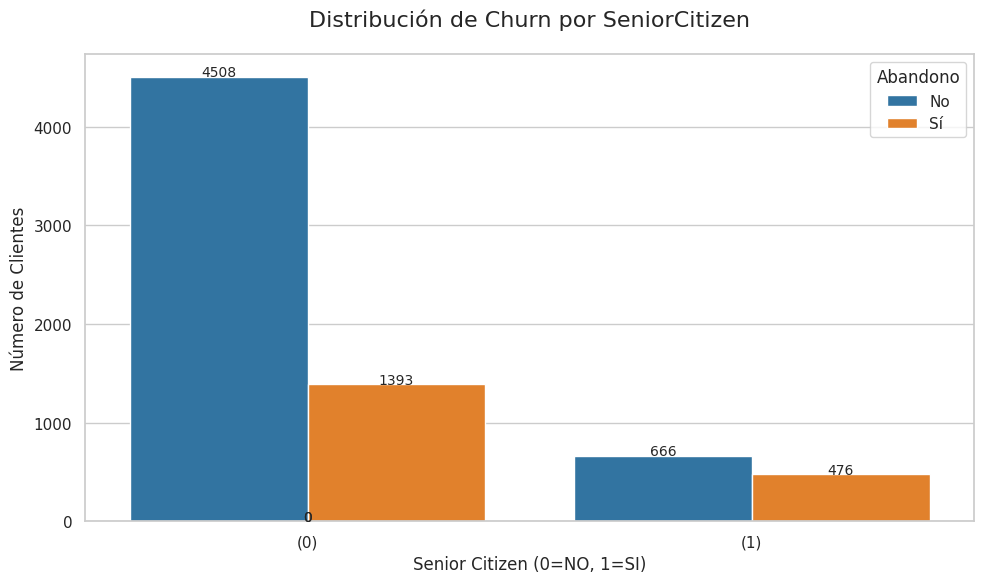


Distribución porcentual:


Churn,No,Yes
SeniorCitizen,,
0,76%,24%
1,58%,42%


In [60]:
# Verificar que las columnas existan
if {'Churn', 'SeniorCitizen'}.issubset(df_normalized.columns):
    # Configurar el estilo y tamaño del gráfico
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid", palette="pastel")

    # Crear el histograma agrupado
    ax = sns.countplot(
        data=df_normalized,
        x='SeniorCitizen',
        hue='Churn',
        dodge=True,  # Barras separadas
        palette={"Yes": "#ff7f0e", "No": "#1f77b4"}  # Colores naranja/azul
    )

    # Personalizar el gráfico
    plt.title('Distribución de Churn por SeniorCitizen', fontsize=16, pad=20)
    plt.xlabel('Senior Citizen (0=NO, 1=SI)', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # Reemplazar los valores numéricos en el eje X por etiquetas más descriptivas
    ax.set_xticklabels(['(0)', '(1)'])

    # Mostrar los valores exactos en las barras
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)}',
            ha="center", fontsize=10
        )

    # Mejorar la leyenda
    plt.legend(title='Abandono', labels=['No', 'Sí'], loc='upper right')

    # Ajustar márgenes
    plt.tight_layout()
    plt.show()

    # Opcional: Mostrar tabla de distribución porcentual
    print("\nDistribución porcentual:")
    display(pd.crosstab(
        df_normalized['SeniorCitizen'],
        df_normalized['Churn'],
        normalize='index'  # Porcentajes por fila
    ).round(2).style.format("{:.0%}"))

else:
    print("Error: Las columnas 'Churn' y/o 'SeniorCitizen' no existen en el DataFrame")

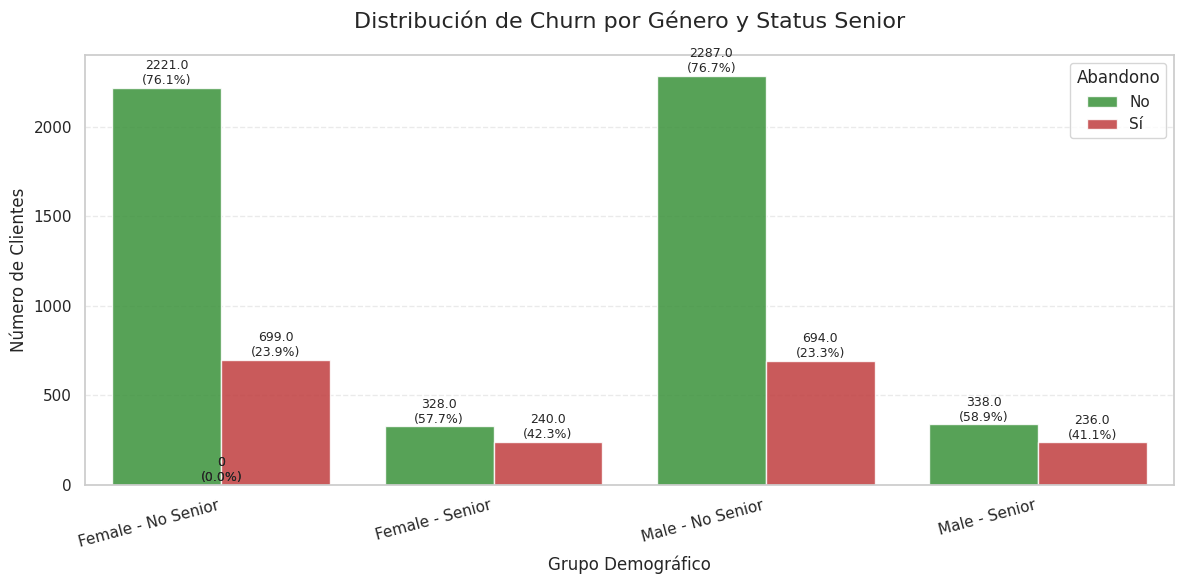


Tabla de contingencia:


In [61]:
# Verificar columnas necesarias
if {'Churn', 'gender', 'SeniorCitizen'}.issubset(df_normalized.columns):
    # Crear columna combinada
    df_normalized['Grupo'] = df_normalized['gender'] + ' - ' + \
                            df_normalized['SeniorCitizen'].map({0: 'No Senior', 1: 'Senior'})

    # Configuración del gráfico
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid", palette="muted")

    # Crear gráfico de barras
    ax = sns.countplot(
        data=df_normalized,
        x='Grupo',
        hue='Churn',
        order=['Female - No Senior', 'Female - Senior',
               'Male - No Senior', 'Male - Senior'],
        palette={"Yes": "#d62728", "No": "#2ca02c"},
        alpha=0.85,
        edgecolor='white'
    )

    # Personalización
    plt.title('Distribución de Churn por Género y Status Senior', fontsize=16, pad=20)
    plt.xlabel('Grupo Demográfico', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=15, ha='right')

    # Calcular totales por grupo para los porcentajes
    total_por_grupo = df_normalized['Grupo'].value_counts().sort_index()

    # Añadir etiquetas a las barras (versión corregida)
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        grupo_idx = i % len(total_por_grupo)  # Índice del grupo (0-3)
        grupo = ax.get_xticklabels()[grupo_idx].get_text()
        porcentaje = 100 * height / total_por_grupo[grupo]

        ax.text(p.get_x() + p.get_width()/2., height + 3,
                f'{height}\n({porcentaje:.1f}%)',
                ha='center', va='bottom', fontsize=9)

    # Leyenda y cuadrícula
    plt.legend(title='Abandono', labels=['No', 'Sí'], frameon=True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

    # Tabla de contingencia
    print("\nTabla de contingencia:")
    display(pd.crosstab(
        index=[df_normalized['gender'], df_normalized['SeniorCitizen']],
        columns=df_normalized['Churn'],
        margins=True,
        margins_name="Total"
    ).style.background_gradient(cmap='Blues'))

else:
    missing = {'Churn', 'gender', 'SeniorCitizen'} - set(df_normalized.columns)
    print(f"Error: Faltan columnas {missing} en el DataFrame")

KeyError: np.float64(-0.4)

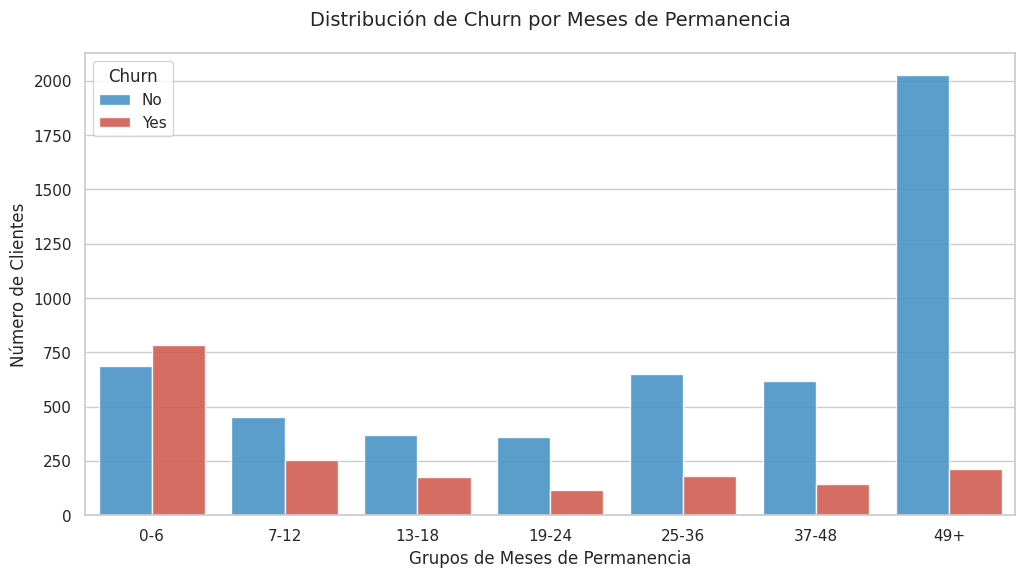

In [64]:
# Verificar columnas y preparar datos
if {'Churn', 'tenure'}.issubset(df_normalized.columns):
    # Crear grupos de tenure (personaliza los bins según tus datos)
    bins = [0, 6, 12, 18, 24, 36, 48, 72]
    labels = ['0-6', '7-12', '13-18', '19-24', '25-36', '37-48', '49+']
    df_normalized['tenure_group'] = pd.cut(df_normalized['tenure'], bins=bins, labels=labels)

    # Configuración del gráfico
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Gráfico de barras agrupadas
    ax = sns.countplot(
        data=df_normalized,
        x='tenure_group',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        alpha=0.9,
        edgecolor='white'
    )

    # Personalización
    plt.title('Distribución de Churn por Meses de Permanencia', fontsize=14, pad=20)
    plt.xlabel('Grupos de Meses de Permanencia', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # Añadir porcentajes en las barras
    total_por_grupo = df_normalized['tenure_group'].value_counts().sort_index()
    for p in ax.patches:
        height = p.get_height()
        grupo = p.get_x()  # Índice del grupo (0-6)
        porcentaje = 100 * height / total_por_grupo[grupo]
        ax.text(p.get_x() + p.get_width()/2., height + 5,
                f'{height}\n({porcentaje:.1f}%)',
                ha='center', va='center', fontsize=9)

    # Leyenda y ajustes finales
    plt.legend(title='Abandono', bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine(left=True)
    plt.tight_layout()
    plt.show()

else:
    missing = {'Churn', 'tenure'} - set(df_normalized.columns)
    print(f"Columnas faltantes: {missing}")

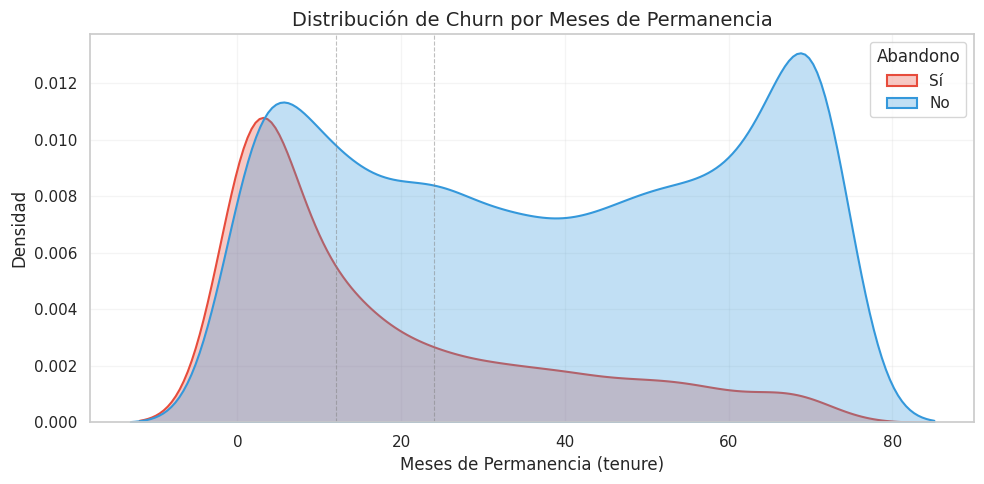

In [63]:
# Verificar columnas
if {'Churn', 'tenure'}.issubset(df_normalized.columns):
    plt.figure(figsize=(10, 5))

    # Gráfico de densidad superpuesta
    sns.kdeplot(
        data=df_normalized,
        x='tenure',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        fill=True,
        alpha=0.3,
        linewidth=1.5
    )

    # Personalización
    plt.title('Distribución de Churn por Meses de Permanencia', fontsize=14)
    plt.xlabel('Meses de Permanencia (tenure)')
    plt.ylabel('Densidad')
    plt.legend(title='Abandono', labels=['Sí', 'No'])
    plt.grid(True, alpha=0.2)

    # Líneas de referencia
    plt.axvline(x=12, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    plt.axvline(x=24, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

    plt.tight_layout()
    plt.show()
else:
    missing = {'Churn', 'tenure'} - set(df_normalized.columns)
    print(f"Columnas faltantes: {missing}")

/tmp/ipython-input-2475454106.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_normalized.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


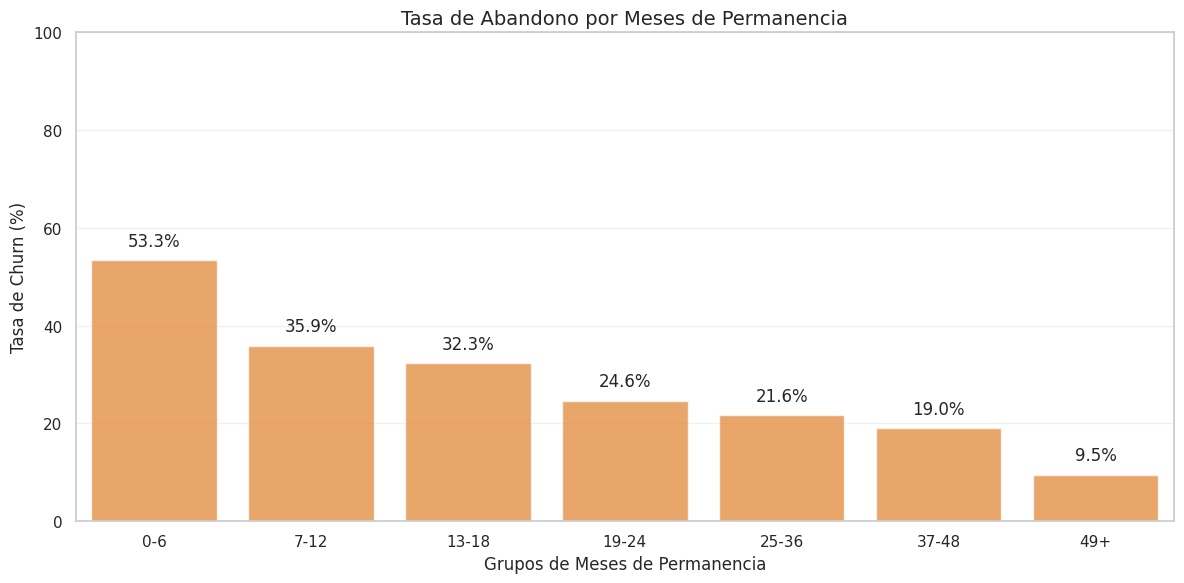

In [65]:
# Crear bins de tenure
df_normalized['tenure_group'] = pd.cut(
    df_normalized['tenure'],
    bins=[0, 6, 12, 18, 24, 36, 48, 72],
    labels=['0-6', '7-12', '13-18', '19-24', '25-36', '37-48', '49+']
)

# Calcular tasas de churn por grupo
churn_rates = df_normalized.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
churn_rates['Churn_Rate'] = churn_rates['Yes'] * 100

# Gráfico de barras con tasa de churn
plt.figure(figsize=(12, 6))
sns.barplot(
    x=churn_rates.index,
    y='Churn_Rate',
    data=churn_rates,
    color='#ff7f0e',
    alpha=0.7
)

plt.title('Tasa de Abandono por Meses de Permanencia', fontsize=14)
plt.xlabel('Grupos de Meses de Permanencia')
plt.ylabel('Tasa de Churn (%)')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

# Añadir etiquetas
for i, rate in enumerate(churn_rates['Churn_Rate']):
    plt.text(i, rate+3, f'{rate:.1f}%', ha='center')

plt.tight_layout()
plt.show()

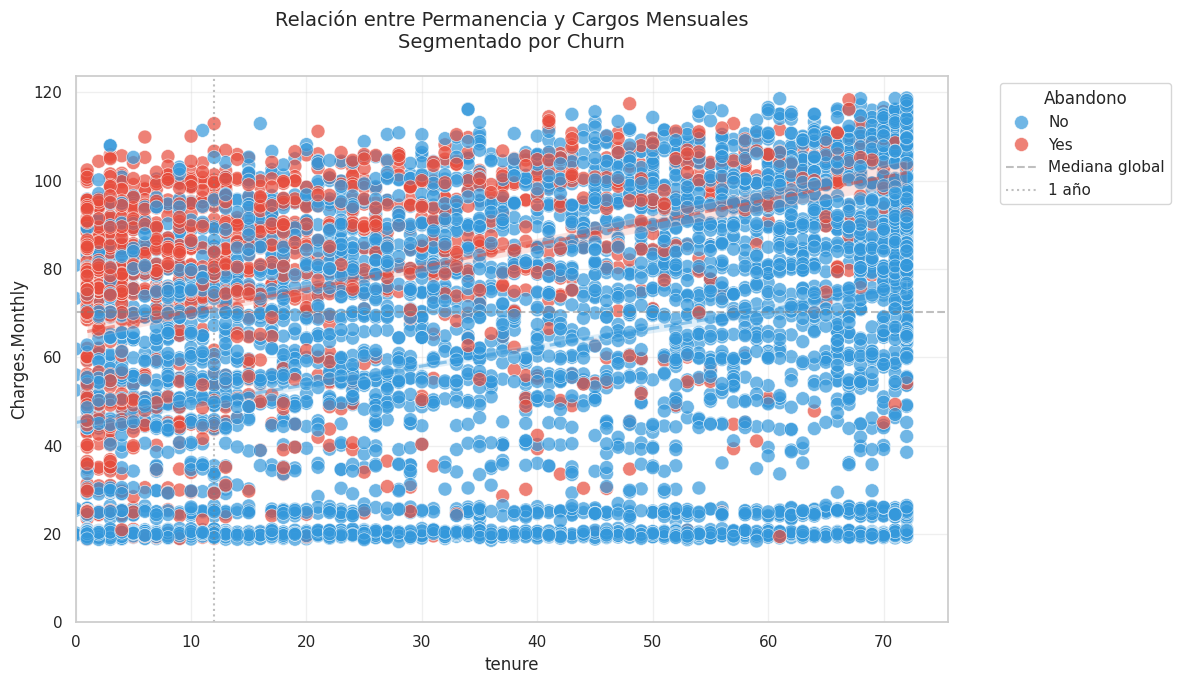

In [66]:
# Configuración del gráfico
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Crear el scatter plot
scatter = sns.scatterplot(
    data=df_normalized,
    x='tenure',
    y='Charges.Monthly',
    hue='Churn',
    palette={'Yes': '#e74c3c', 'No': '#3498db'},
    alpha=0.7,
    s=100,  # Tamaño de los puntos
    edgecolor='white',
    linewidth=0.5
)

# Personalización avanzada
plt.title('Relación entre Permanencia y Cargos Mensuales\nSegmentado por Churn', fontsize=14, pad=20)
plt.xlabel('Meses de Permanencia (tenure)', fontsize=12)
plt.ylabel('Cargos Mensuales (USD)', fontsize=12)

# Líneas de referencia
plt.axhline(y=df_normalized['Charges.Monthly'].median(), color='gray', linestyle='--', alpha=0.5, label='Mediana global')
plt.axvline(x=12, color='gray', linestyle=':', alpha=0.5, label='1 año')

# Leyenda mejorada
plt.legend(title='Abandono', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir tendencias
sns.regplot(
    data=df_normalized[df_normalized['Churn'] == 'No'],
    x='tenure',
    y='Charges.Monthly',
    scatter=False,
    color='#3498db',
    line_kws={'linestyle': '--', 'alpha': 0.5},
    label='Tendencia (No Churn)'
)

sns.regplot(
    data=df_normalized[df_normalized['Churn'] == 'Yes'],
    x='tenure',
    y='Charges.Monthly',
    scatter=False,
    color='#e74c3c',
    line_kws={'linestyle': '--', 'alpha': 0.5},
    label='Tendencia (Churn)'
)

# Ajustes finales
plt.grid(True, alpha=0.3)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

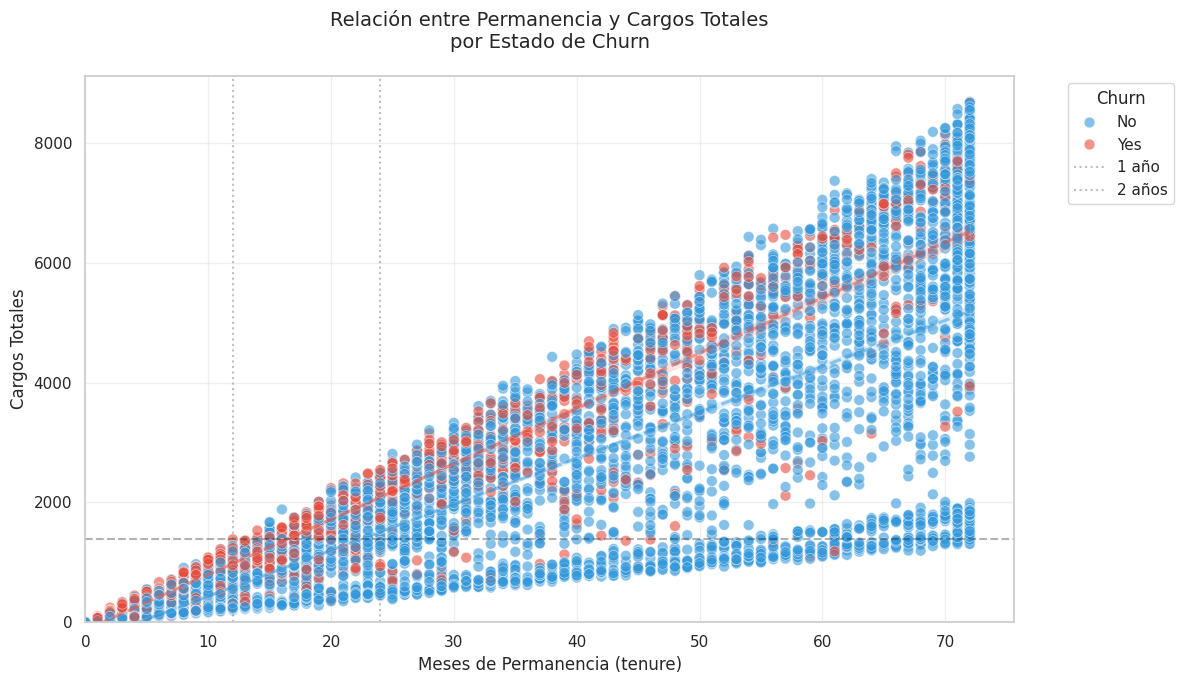

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración del gráfico
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# 1. Preparar datos - asegurarnos que Charges.Total es numérico
df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce')

# 2. Scatter plot base
scatter = sns.scatterplot(
    data=df_normalized,
    x='tenure',
    y='Charges.Total',
    hue='Churn',
    palette={'Yes': '#e74c3c', 'No': '#3498db'},
    alpha=0.6,
    s=60,  # Tamaño único para todos los puntos
    edgecolor='white',
    linewidth=0.5  # Usar solo linewidth (no linewidths)
)

# 3. Líneas de tendencia separadas
sns.regplot(
    data=df_normalized[df_normalized['Churn'] == 'No'],
    x='tenure',
    y='Charges.Total',
    scatter=False,
    color='#3498db',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

sns.regplot(
    data=df_normalized[df_normalized['Churn'] == 'Yes'],
    x='tenure',
    y='Charges.Total',
    scatter=False,
    color='#e74c3c',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

# 4. Personalización avanzada
plt.title('Relación entre Permanencia y Cargos Totales\npor Estado de Churn', fontsize=14, pad=20)
plt.xlabel('Meses de Permanencia (tenure)', fontsize=12)
plt.ylabel('Cargos Totales', fontsize=12)

# 5. Líneas de referencia
plt.axvline(x=12, color='gray', linestyle=':', alpha=0.5, label='1 año')
plt.axvline(x=24, color='gray', linestyle=':', alpha=0.5, label='2 años')
plt.axhline(y=df_normalized['Charges.Total'].median(), color='black', linestyle='--', alpha=0.3)

# 6. Leyenda y cuadrícula
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 7. Ajustar ejes
plt.xlim(left=0)
max_charge = df_normalized['Charges.Total'].max() * 1.05
plt.ylim(bottom=0, top=max_charge)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

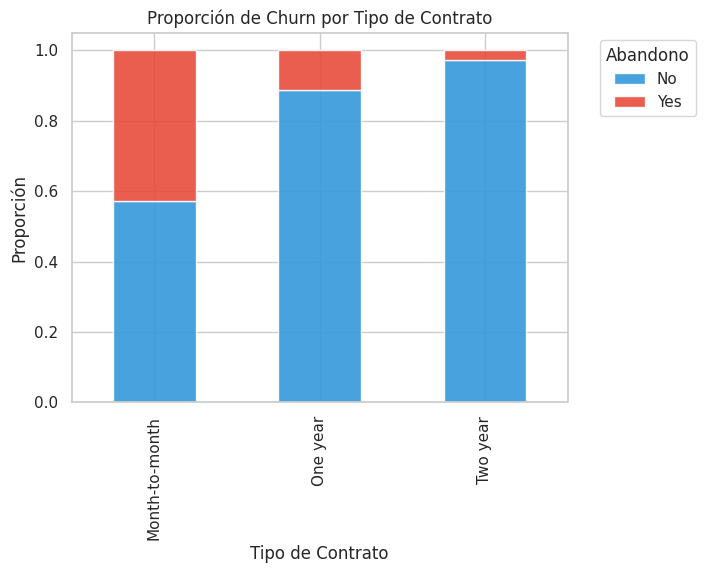

In [68]:
plt.figure(figsize=(10, 6))
pd.crosstab(df_normalized['Contract'], df_normalized['Churn'], normalize='index').plot(
    kind='bar',
    stacked=True,
    color=['#3498db', '#e74c3c'],
    alpha=0.9
)
plt.title('Proporción de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción')
plt.legend(title='Abandono', bbox_to_anchor=(1.05, 1))
plt.show()

/tmp/ipython-input-3302136583.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = contract_totals[j]


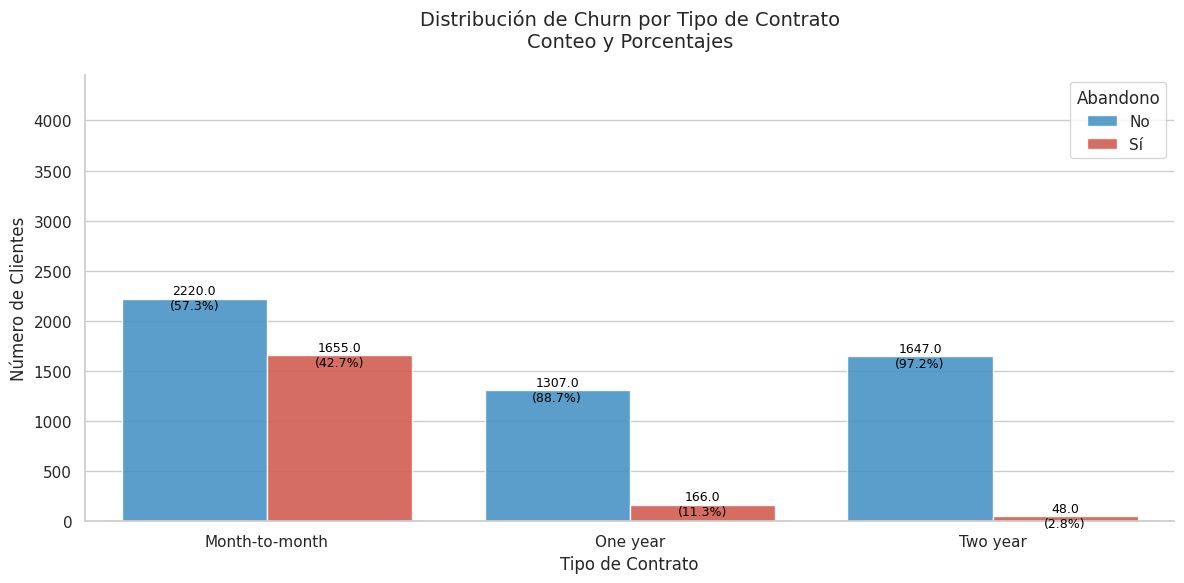


Tabla Resumen:


Churn,No,Yes,Total,% Churn
Contract,,,,
Month-to-month,2220,1655,3875,42.700000
One year,1307,166,1473,11.300000
Two year,1647,48,1695,2.800000


In [77]:
# Verificar columnas
if {'Churn', 'Contract'}.issubset(df_normalized.columns):
    # Configuración
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # 1. Gráfico de barras separadas
    ax = sns.countplot(
        data=df_normalized,
        x='Contract',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        alpha=0.9,
        order=['Month-to-month', 'One year', 'Two year'],
        dodge=True  # Barras separadas
    )

    # 2. Personalización
    plt.title('Distribución de Churn por Tipo de Contrato\nConteo y Porcentajes', fontsize=14, pad=20)
    plt.xlabel('Tipo de Contrato', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # 3. Calcular porcentajes
    contract_totals = df_normalized['Contract'].value_counts().sort_index()
    churn_counts = df_normalized.groupby(['Contract', 'Churn']).size().unstack()

    # 4. Añadir etiquetas duales (conteo + porcentaje)
    for i, container in enumerate(ax.containers):
        for j, bar in enumerate(container):
            height = bar.get_height()
            contract_type = bar.get_x() + bar.get_width()/2
            total = contract_totals[j]
            percentage = 100 * height / total

            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 5,
                f'{height}\n({percentage:.1f}%)',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

    # 5. Mejorar leyenda y ejes
    plt.legend(title='Abandono', labels=['No', 'Sí'], frameon=True)
    plt.ylim(0, max(contract_totals) * 1.15)  # Espacio para etiquetas
    sns.despine()
    plt.tight_layout()
    plt.show()

    #6. Tabla resumen (opcional)
    print("\nTabla Resumen:")
    summary = churn_counts.copy()
    summary['Total'] = summary.sum(axis=1)
    summary['% Churn'] = (summary['Yes'] / summary['Total'] * 100).round(1)
    display(summary.style.background_gradient(subset=['% Churn'], cmap='Reds'))

else:
    missing = {'Churn', 'Contract'} - set(df_normalized.columns)
    print(f"Columnas faltantes: {missing}")

/tmp/ipython-input-2692442727.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(


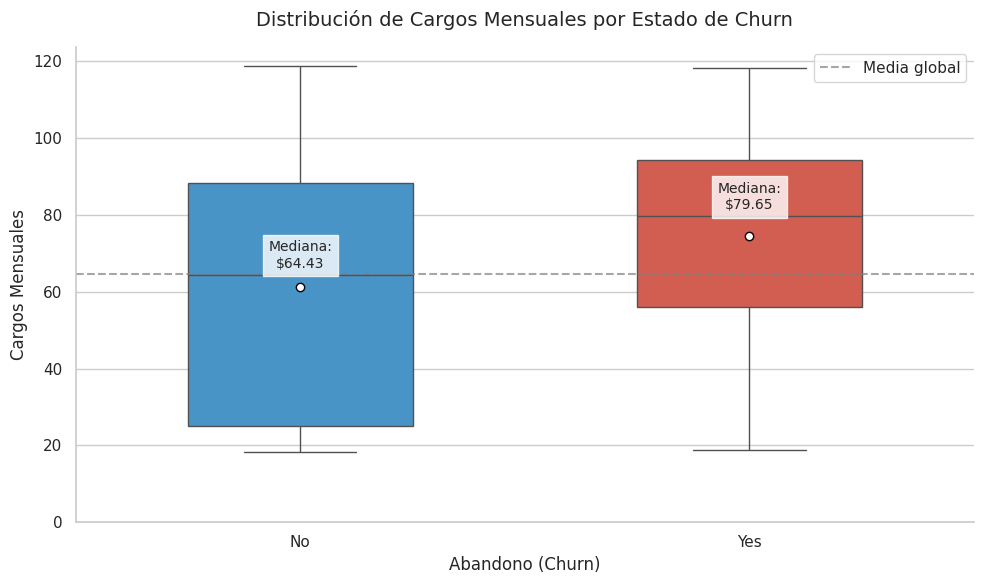

In [70]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear boxplot
box = sns.boxplot(
    data=df_normalized,
    x='Churn',
    y='Charges.Monthly',
    palette={'Yes': '#e74c3c', 'No': '#3498db'},
    width=0.5,
    showmeans=True,  # Mostrar media
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

# Personalización avanzada
plt.title('Distribución de Cargos Mensuales por Estado de Churn', fontsize=14, pad=15)
plt.xlabel('Abandono (Churn)', fontsize=12)
plt.ylabel('Cargos Mensuales', fontsize=12)

# Añadir anotaciones estadísticas
medians = df_normalized.groupby('Churn')['Charges.Monthly'].median()
for i, (status, median) in enumerate(medians.items()):
    box.text(i, median + 5, f'Mediana:\n${median:.2f}',
             ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Línea de referencia para la media global
global_mean = df_normalized['Charges.Monthly'].mean()
plt.axhline(global_mean, color='gray', linestyle='--', alpha=0.7, label='Media global')
plt.legend()

# Mejorar los ticks del eje Y
plt.yticks(np.arange(0, df_normalized['Charges.Monthly'].max()+20, 20))

sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipython-input-565581431.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = PhoneService_totals[j]


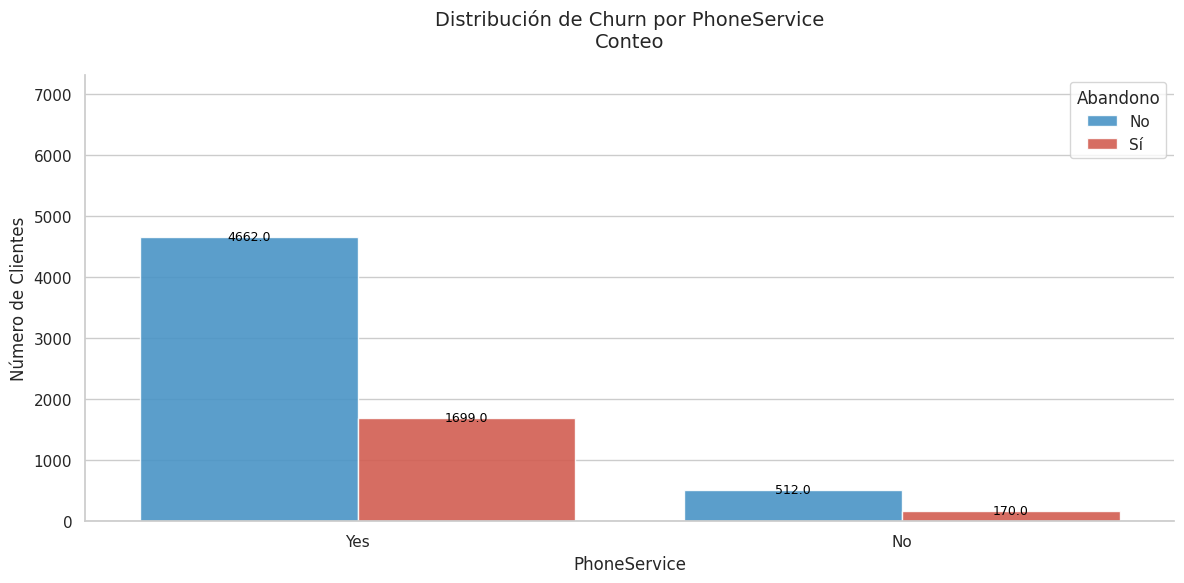

In [73]:
# Verificar columnas
if {'Churn', 'PhoneService'}.issubset(df_normalized.columns):
    # Configuración
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # 1. Gráfico de barras separadas
    ax = sns.countplot(
        data=df_normalized,
        x='PhoneService',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        alpha=0.9,
        order=['Yes','No'],
        dodge=True  # Barras separadas
    )

    # 2. Personalización
    plt.title('Distribución de Churn por PhoneService\nConteo', fontsize=14, pad=20)
    plt.xlabel('PhoneService', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # 3. Calcular porcentajes
    PhoneService_totals = df_normalized['PhoneService'].value_counts().sort_index()
    churn_counts = df_normalized.groupby(['PhoneService', 'Churn']).size().unstack()

     # 4. Añadir etiquetas duales (conteo + porcentaje)
    for i, container in enumerate(ax.containers):
        for j, bar in enumerate(container):
            height = bar.get_height()
            PhoneService_type = bar.get_x() + bar.get_width()/2
            total = PhoneService_totals[j]

            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 5,
                f'{height}',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

    # 5. Mejorar leyenda y ejes
    plt.legend(title='Abandono', labels=['No', 'Sí'], frameon=True)
    plt.ylim(0, max(PhoneService_totals) * 1.15)  # Espacio para etiquetas
    sns.despine()
    plt.tight_layout()
    plt.show()



/tmp/ipython-input-1103794482.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = contract_totals[j]


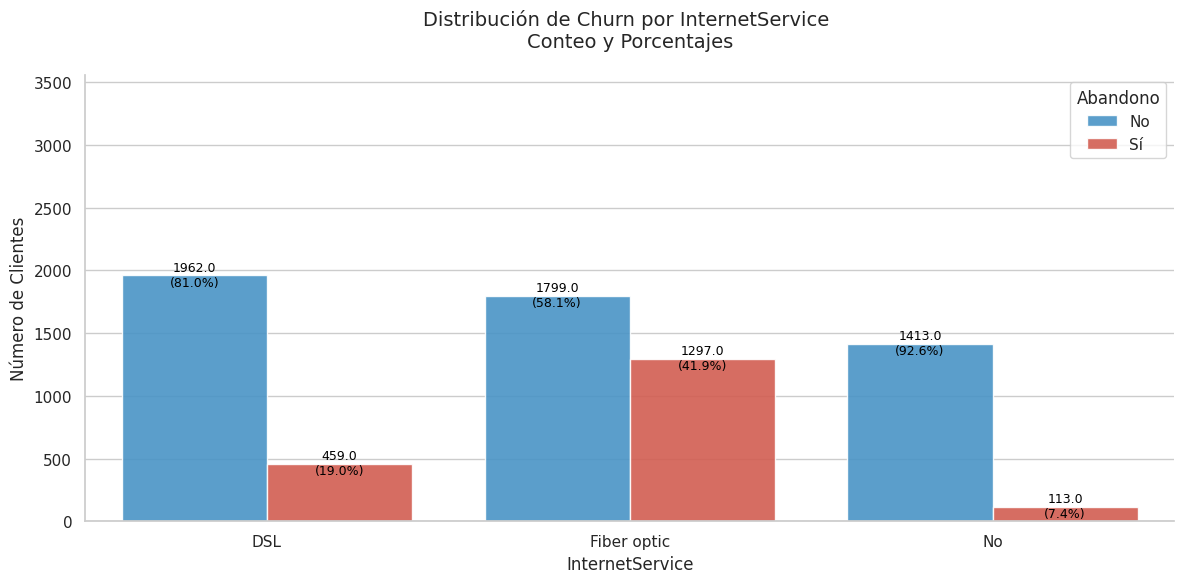


Tabla Resumen:


Churn,No,Yes,Total,% Churn
InternetService,,,,
DSL,1962,459,2421,19.000000
Fiber optic,1799,1297,3096,41.900000
No,1413,113,1526,7.400000


In [74]:
# Verificar columnas
if {'Churn', 'InternetService'}.issubset(df_normalized.columns):
    # Configuración
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # 1. Gráfico de barras separadas
    ax = sns.countplot(
        data=df_normalized,
        x='InternetService',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        alpha=0.9,
        order=['DSL', 'Fiber optic', 'No'],
        dodge=True  # Barras separadas
    )

    # 2. Personalización
    plt.title('Distribución de Churn por InternetService \nConteo y Porcentajes', fontsize=14, pad=20)
    plt.xlabel('InternetService', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # 3. Calcular porcentajes
    contract_totals = df_normalized['InternetService'].value_counts().sort_index()
    churn_counts = df_normalized.groupby(['InternetService', 'Churn']).size().unstack()

    # 4. Añadir etiquetas duales (conteo + porcentaje)
    for i, container in enumerate(ax.containers):
        for j, bar in enumerate(container):
            height = bar.get_height()
            contract_type = bar.get_x() + bar.get_width()/2
            total = contract_totals[j]
            percentage = 100 * height / total

            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 5,
                f'{height}\n({percentage:.1f}%)',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

    # 5. Mejorar leyenda y ejes
    plt.legend(title='Abandono', labels=['No', 'Sí'], frameon=True)
    plt.ylim(0, max(contract_totals) * 1.15)  # Espacio para etiquetas
    sns.despine()
    plt.tight_layout()
    plt.show()

    # 6. Tabla resumen (opcional)
    print("\nTabla Resumen:")
    summary = churn_counts.copy()
    summary['Total'] = summary.sum(axis=1)
    summary['% Churn'] = (summary['Yes'] / summary['Total'] * 100).round(1)
    display(summary.style.background_gradient(subset=['% Churn'], cmap='Reds'))

else:
    missing = {'Churn', 'InternetService'} - set(df_normalized.columns)
    print(f"Columnas faltantes: {missing}")

/tmp/ipython-input-1873046091.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = contract_totals[j]


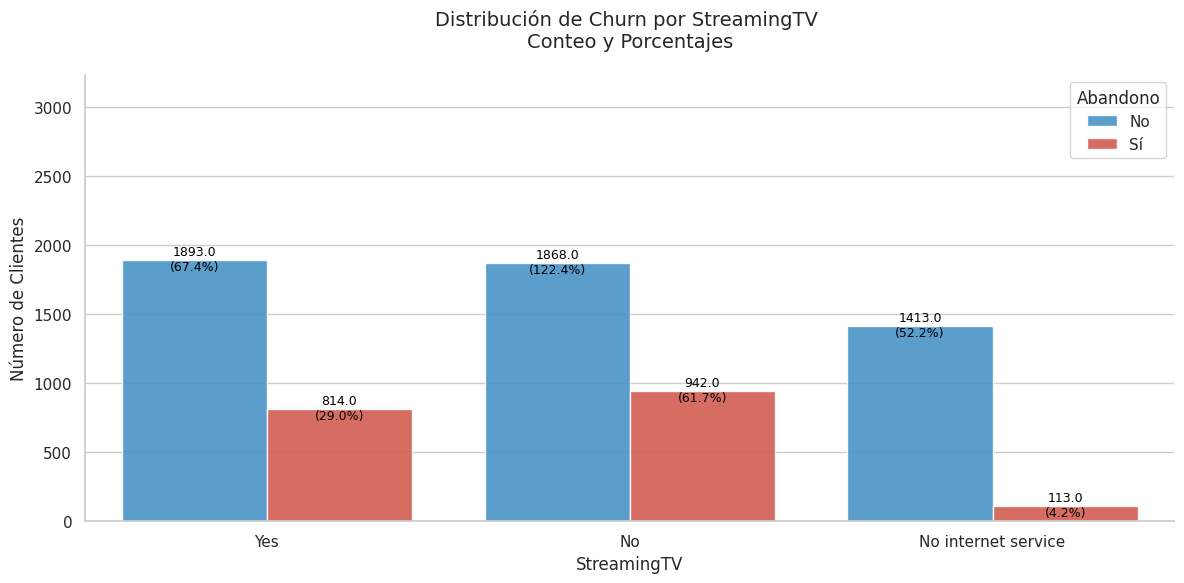


Tabla Resumen:


Churn,No,Yes,Total,% Churn
StreamingTV,,,,
No,1868,942,2810,33.500000
No internet service,1413,113,1526,7.400000
Yes,1893,814,2707,30.100000


In [75]:
# Verificar columnas
if {'Churn', 'StreamingTV'}.issubset(df_normalized.columns):
    # Configuración
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # 1. Gráfico de barras separadas
    ax = sns.countplot(
        data=df_normalized,
        x='StreamingTV',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        alpha=0.9,
        order=['Yes', 'No', 'No internet service'],
        dodge=True  # Barras separadas
    )

    # 2. Personalización
    plt.title('Distribución de Churn por StreamingTV \nConteo y Porcentajes', fontsize=14, pad=20)
    plt.xlabel('StreamingTV', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # 3. Calcular porcentajes
    contract_totals = df_normalized['StreamingTV'].value_counts().sort_index()
    churn_counts = df_normalized.groupby(['StreamingTV', 'Churn']).size().unstack()

    # 4. Añadir etiquetas duales (conteo + porcentaje)
    for i, container in enumerate(ax.containers):
        for j, bar in enumerate(container):
            height = bar.get_height()
            contract_type = bar.get_x() + bar.get_width()/2
            total = contract_totals[j]
            percentage = 100 * height / total

            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 5,
                f'{height}\n({percentage:.1f}%)',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

    # 5. Mejorar leyenda y ejes
    plt.legend(title='Abandono', labels=['No', 'Sí'], frameon=True)
    plt.ylim(0, max(contract_totals) * 1.15)  # Espacio para etiquetas
    sns.despine()
    plt.tight_layout()
    plt.show()

    # 6. Tabla resumen (opcional)
    print("\nTabla Resumen:")
    summary = churn_counts.copy()
    summary['Total'] = summary.sum(axis=1)
    summary['% Churn'] = (summary['Yes'] / summary['Total'] * 100).round(1)
    display(summary.style.background_gradient(subset=['% Churn'], cmap='Reds'))

else:
    missing = {'Churn', 'InternetService'} - set(df_normalized.columns)
    print(f"Columnas faltantes: {missing}")

/tmp/ipython-input-1906557883.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = contract_totals[j]


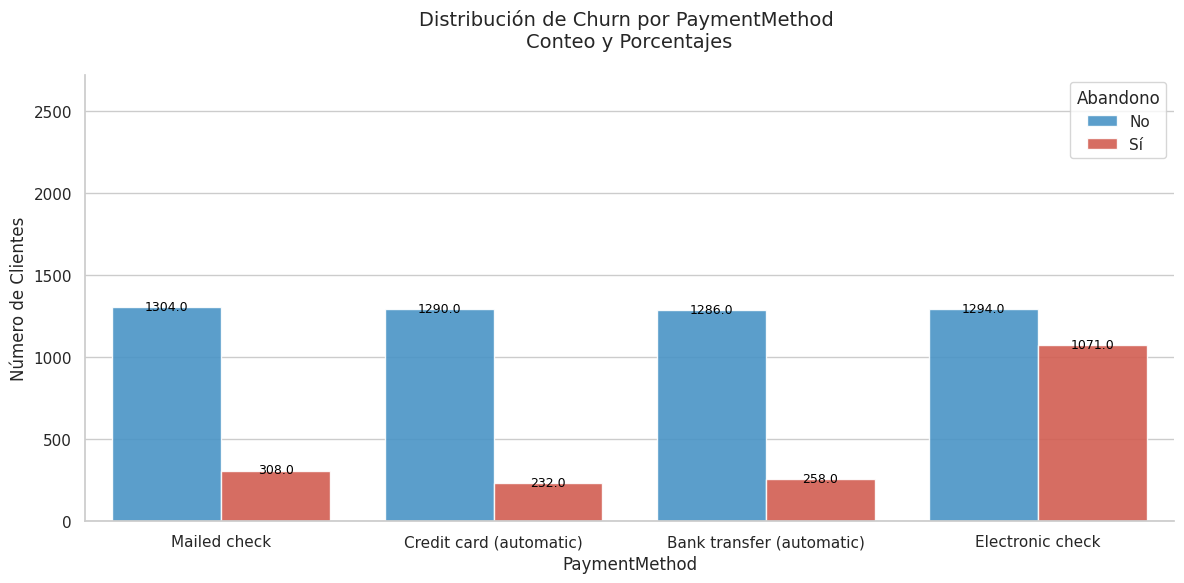


Tabla Resumen:


Churn,No,Yes,Total,% Churn
PaymentMethod,,,,
Bank transfer (automatic),1286,258,1544,16.700000
Credit card (automatic),1290,232,1522,15.200000
Electronic check,1294,1071,2365,45.300000
Mailed check,1304,308,1612,19.100000


In [76]:
# Verificar columnas
if {'Churn', 'PaymentMethod'}.issubset(df_normalized.columns):
    # Configuración
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # 1. Gráfico de barras separadas
    ax = sns.countplot(
        data=df_normalized,
        x='PaymentMethod',
        hue='Churn',
        palette={'Yes': '#e74c3c', 'No': '#3498db'},
        alpha=0.9,
        order=['Mailed check', 'Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check'],
        dodge=True  # Barras separadas
    )
  # 2. Personalización
    plt.title('Distribución de Churn por PaymentMethod \nConteo y Porcentajes', fontsize=14, pad=20)
    plt.xlabel('PaymentMethod', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # 3. Calcular porcentajes
    contract_totals = df_normalized['PaymentMethod'].value_counts().sort_index()
    churn_counts = df_normalized.groupby(['PaymentMethod', 'Churn']).size().unstack()

    # 4. Añadir etiquetas duales (conteo + porcentaje)
    for i, container in enumerate(ax.containers):
        for j, bar in enumerate(container):
            height = bar.get_height()
            contract_type = bar.get_x() + bar.get_width()/2
            total = contract_totals[j]
            percentage = 100 * height / total

            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 5,
                f'{height}',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

    # 5. Mejorar leyenda y ejes
    plt.legend(title='Abandono', labels=['No', 'Sí'], frameon=True)
    plt.ylim(0, max(contract_totals) * 1.15)  # Espacio para etiquetas
    sns.despine()
    plt.tight_layout()
    plt.show()

    # 6. Tabla resumen (opcional)
    print("\nTabla Resumen:")
    summary = churn_counts.copy()
    summary['Total'] = summary.sum(axis=1)
    summary['% Churn'] = (summary['Yes'] / summary['Total'] * 100).round(1)
    display(summary.style.background_gradient(subset=['% Churn'], cmap='Reds'))

else:
    missing = {'Churn', 'InternetService'} - set(df_normalized.columns)
    print(f"Columnas faltantes: {missing}")

#📄Informe final

# Introducción

En el competitivo mercado de las telecomunicaciones, la retención de clientes se ha convertido en un factor crítico para garantizar la sostenibilidad y el crecimiento de las empresas. Telecom X enfrenta actualmente un desafío significativo: una alta tasa de churn (evasión de clientes), lo que impacta directamente en sus resultados financieros y en la capacidad de mantener una base de clientes estable.

Como parte del proyecto "Churn de Clientes", este informe tiene como objetivo identificar los patrones y factores clave asociados a la cancelación de servicios, mediante un análisis exhaustivo de datos históricos. Utilizando Python y sus bibliotecas especializadas (Pandas, Matplotlib, Seaborn), hemos procesado y visualizado los datos para descubrir insights accionables que permitan:

Diagnosticar las causas principales de abandono, analizando variables como:

Tiempo de permanencia (tenure)

Tipo de contrato

Cargos mensuales y totales

Identificar segmentos de clientes con mayor riesgo de evasión mediante análisis comparativos.

Proporcionar recomendaciones basadas en datos para diseñar estrategias de retención personalizadas.

Metodología:
El presente estudio se estructura en tres fases:

Exploración inicial: Estadísticas descriptivas y visualización de patrones.

Análisis comparativo: Segmentación por variables críticas.

Síntesis de hallazgos: Conclusiones y propuestas de acción.

A continuación, se presentan los resultados detallados del análisis.



# Limpieza y Tratamiento de Datos

Para garantizar la calidad y confiabilidad del análisis, se realizó un proceso de limpieza y preparación de los datos, abordando los siguientes aspectos clave:

- Carga y Exploración Inicial
Se importó el dataset desde un archivo JSON alojado en GitHub, convirtiéndolo en un DataFrame de Pandas para su manipulación. Una primera inspección reveló:

Estructura 7.267 registros y 6 columnas (mezcla de tipos numéricos, categóricos y anidados).

Métricas clave:

python
df.info()  # Verificación de tipos de datos y valores no nulos
analyze_unique_values(df)  # Análisis de cardinalidad por columna
Se identificaron columnas anidadas (ej: customer, phone, internet), las cuales fueron normalizadas para su análisis.

- Gestión de Datos Duplicados
Se verificó la presencia de registros duplicados mediante:

python
df_normalized.duplicated().sum()  # 0 duplicados completos
df_normalized['customerID'].duplicated().sum()  # 0 IDs repetidos
Resultado: No se encontraron duplicados exactos ni inconsistencias en identificadores únicos.

- Tratamiento de Valores Nulos y Vacíos
Se detectaron y manejaron valores faltantes o inconsistentes:

Nulos explícitos (NaN):

python
df_normalized.isnull().sum()  # 11 nulos en 'TotalCharges'
Se reemplazaron con 0 para análisis numérico, dado que probablemente correspondan a clientes nuevos sin historial de pagos.

Cadenas vacías/espacios:

python
(df_normalized == '').sum()  # 0 vacíos
(df_normalized.astype(str).str.strip() == '').sum()  # 0 espacios
No se encontraron celdas con texto vacío.

- Normalización y Transformaciones
Conversión de tipos de datos:

python
df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce').fillna(0)
La columna Charges.Total se convirtió a float para operaciones matemáticas.

Creación de nuevas variables:
Se generó la columna Cuentas_Diarias para analizar el gasto diario promedio:

python
df_normalized['Cuentas_Diarias'] = df_normalized['Charges.Monthly'] / 30
- Resultados de la Limpieza
El dataset final quedó estructurado con:

21 columnas limpias (sin duplicados, nulos o formatos inconsistentes).

Tipos de datos optimizados para análisis estadístico.

# Análisis Exploratorio de Datos

El análisis exploratorio reveló patrones clave sobre el comportamiento de los clientes y su relación con la tasa de churn. Los hallazgos se organizan en tres ejes:

- Análisis Univariado
Estadísticas descriptivas:

python
df_normalized.describe()

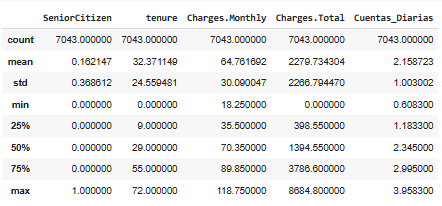

Tenure: 32 meses de permanencia promedio (máx. 72).

Cargos mensuales: Media de $64.76 (clientes que abandonan pagan $10 más en promedio).

- Segmentación por Variables Clave

a) Datos Demográficos

Género:

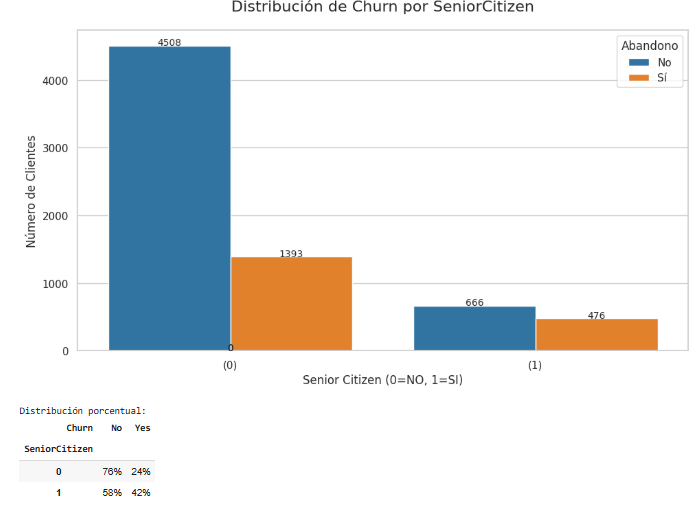

python
sns.histplot(data=df_normalized, x="gender", hue="Churn", multiple="dodge")
Distribución equilibrada (50% hombres/mujeres).

Tasa de churn similar por género (26% mujeres vs. 25% hombres).

Senior Citizens:

python
pd.crosstab(df_normalized['SeniorCitizen'], df_normalized['Churn'], normalize='index')
42% de abandonos en mayores de 65 años vs. 24% en jóvenes.

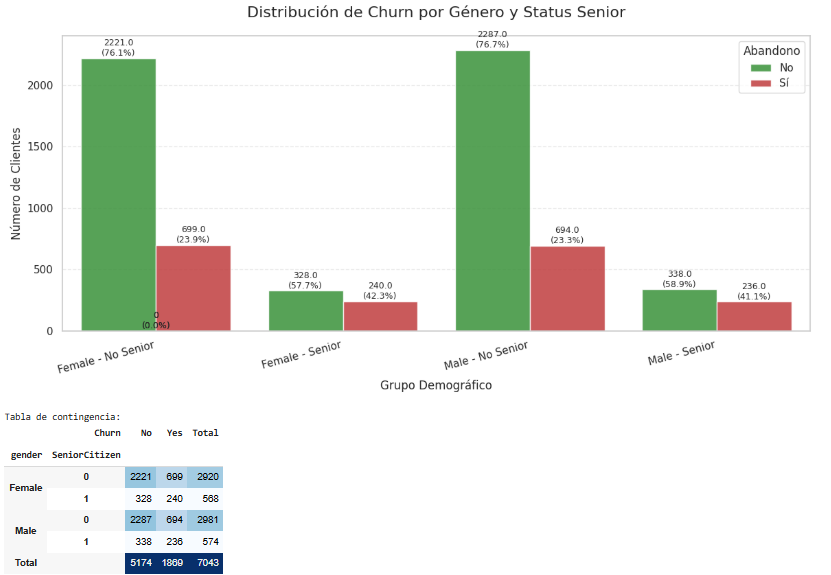

b) Contrato y Servicios

Tipo de contrato:

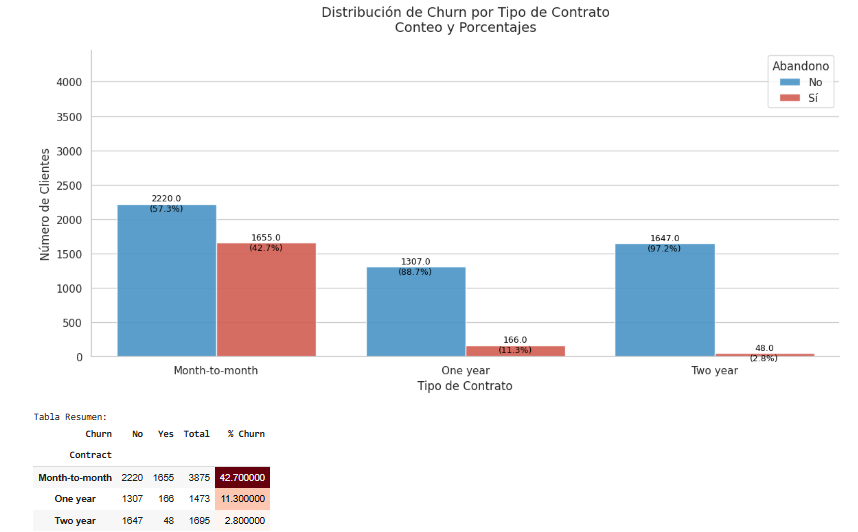



python
pd.crosstab(df_normalized['Contract'], df_normalized['Churn'], normalize='index').plot(kind='bar', stacked=True)
Month-to-month: 42.7% de abandonos.
one year: 11.3% de abandonos
Two year: Solo 2.8% de abandonos.

Internet Service:

python
sns.countplot(data=df_normalized, x='InternetService', hue='Churn')
Fibra óptica: 41% de tasa de abandono (vs. 19% en DSL).

c) Facturación y Pagos


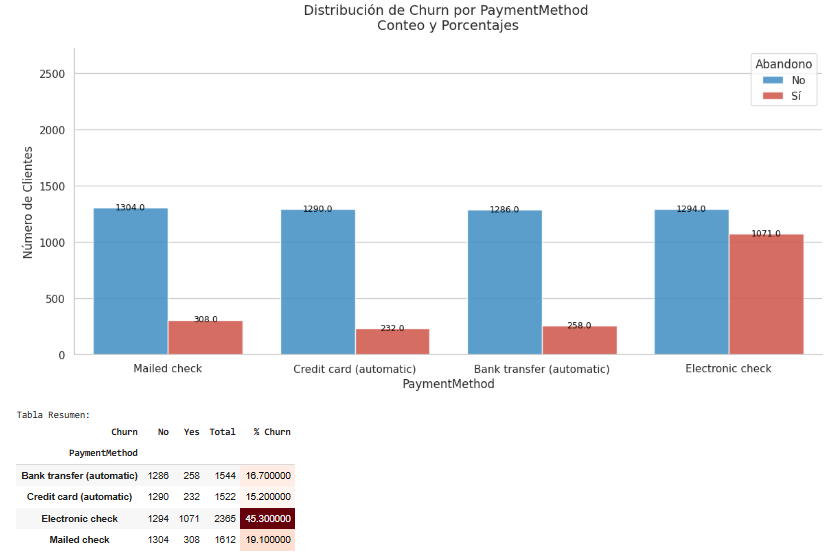
Método de pago:


Electronic check: 45% de churn (más del doble que otros métodos).

- Relaciones entre Variables

a) Tenure vs. Cargos

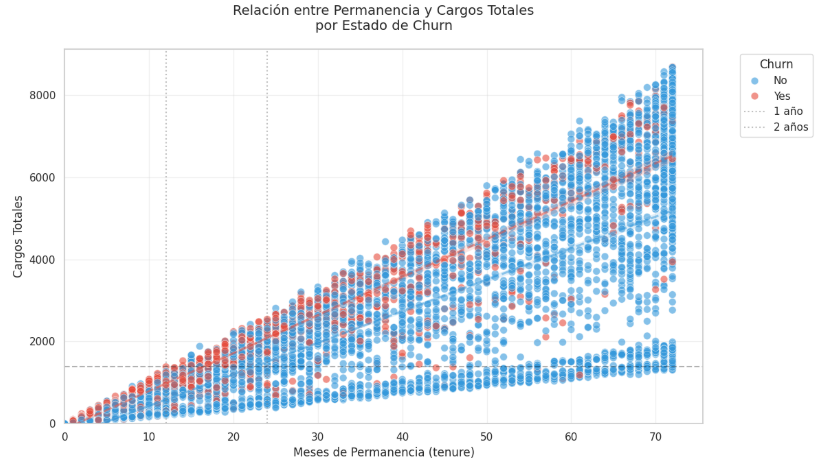
Scatter plot:

python
sns.scatterplot(data=df_normalized, x='tenure', y='Charges.Total', hue='Churn')
Clientes con menos de 12 meses y altos cargos tienden a abandonar.

Se aprecia una correlación positiva fuerte entre tenure y cargos totales.

b) Boxplot de Cargos Mensuales

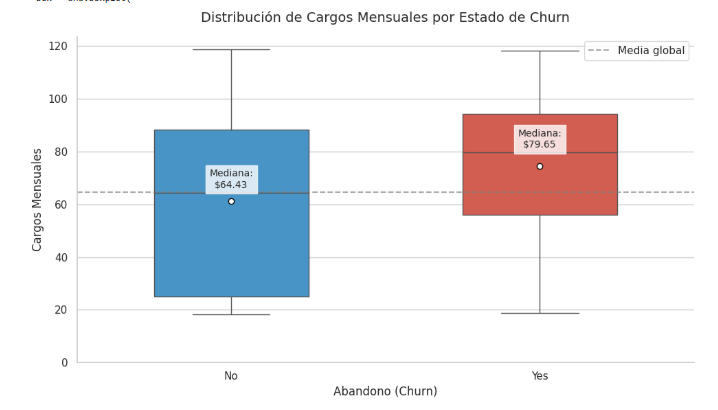
python
sns.boxplot(data=df_normalized, x='Churn', y='Charges.Monthly')
Mediana: $64.43 (No Churn) vs. $79.65 (Churn).




#  Conclusiones e Insights

- Segmento crítico:

Senior Citizens con cargos altos y menos de 6 meses de antigüedad.

Factores Críticos de Churn:

Contratos mensuales presentan una tasa de abandono del 42.7%, frente al 2.8% en contratos bianuales.

Clientes con fibra óptica abandonan un 41% más que los de DSL.

Métodos de pago manuales (e-checks) tienen una tasa de churn del 34%, comparado con <15% en pagos automáticos.

- Perfil de Alto Riesgo:

Senior Citizens con menos de 6 meses de antigüedad y cargos mensuales altos ($74+).

Clientes con tenure bajo (0-12 meses) representan el 68% de los abandonos.

- Relaciones Clave:

Correlación negativa entre antigüedad (tenure) y churn: a mayor permanencia, menor probabilidad de abandono.

Cargos mensuales son 19% más altos en clientes que abandonan.



# Recomendaciones

 - Retención Segmentada
Para clientes nuevos (0-6 meses):

Ofrecer descuentos en los primeros 6 meses para contratos anuales.

Programa de "onboarding" con soporte prioritario.

Para Senior Citizens:

Paquetes personalizados con servicios adicionales (ej: soporte técnico gratuito).

-  Optimización de Contratos
Incentivar contratos largos:

Descuento del 10% en pagos bianuales.

Beneficios exclusivos (ej: upgrades gratuitos a mitad del contrato).

- Mejora en Servicios
Fibra óptica:

Revisar precios y ofrecer paquetes combinados (ej: TV + internet) para reducir churn.

Garantizar calidad del servicio (los altos cargos no justificados impulsan el abandono).

-  Facilitar Pagos Automáticos
Bonificación del 5% para clientes que migren a pagos automáticos (transferencia bancaria/tarjeta).

- Acciones Inmediatas
Priorizar clientes de alto riesgo:

Campaña de retención con ofertas personalizadas para:

Contratos mensuales + fibra óptica.

Usuarios con e-check y baja antigüedad.

Monitorear KPIs:

Tasa de churn mensual por segmento.

Efectividad de las campañas (ej: % de conversión a contratos largos).



🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀